/home/dylan/micromamba/envs/sam-nerf/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
$UNUSED$ criterion.empty_weight, Ckpt Shape: torch.Size([2])


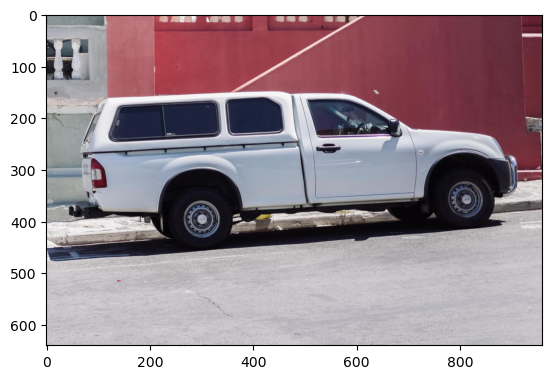

In [1]:
from semantic_sam import prepare_image, plot_multi_results, build_semantic_sam, SemanticSAMPredictor
original_image, input_image = prepare_image(image_pth='examples/truck.jpg')  # change the image path to your image
mask_generator = SemanticSAMPredictor(build_semantic_sam(model_type='L', ckpt='swinl_only_sam_many2many.pth')) # model_type: 'L' / 'T', depends on your checkpint
iou_sort_masks, area_sort_masks = mask_generator.predict_masks(original_image, input_image, point=[[0.1, 0.1]]) # input point [[w, h]] relative location, i.e, [[0.5, 0.5]] is the center of the image
plot_multi_results(iou_sort_masks, area_sort_masks, original_image, save_path='../vis')  # results and original images will be saved at save_path

In [2]:
import torch
# load features.pt
features = torch.load('backbone_features.pt')
mask_features = torch.load('mask_features.pt')
multi_scale_features = torch.load('multi_scale_features.pt')
transfomer_encoder_features = torch.load('transformer_encoder_features.pt')
print("backbone features", features.keys())
print("backbone features res2", features["res2"].shape)
print("backbone features res3", features["res3"].shape)
print("backbone features res4", features["res4"].shape)
print("backbone features res5", features["res5"].shape)
print("mask features shape", mask_features.shape)
print("multi scale features shape len", len(multi_scale_features))
for i in range(len(multi_scale_features)):
    print("multi scale features shape", multi_scale_features[i].shape)
print("transformer encoder features shape", transfomer_encoder_features.shape)

backbone features dict_keys(['res2', 'res3', 'res4', 'res5'])
backbone features res2 torch.Size([1, 192, 160, 240])
backbone features res3 torch.Size([1, 384, 80, 120])
backbone features res4 torch.Size([1, 768, 40, 60])
backbone features res5 torch.Size([1, 1536, 20, 30])
mask features shape torch.Size([1, 256, 160, 240])
multi scale features shape len 4
multi scale features shape torch.Size([1, 256, 80, 120])
multi scale features shape torch.Size([1, 256, 40, 60])
multi scale features shape torch.Size([1, 256, 20, 30])
multi scale features shape torch.Size([1, 256, 10, 15])
transformer encoder features shape torch.Size([1, 256, 80, 120])
